In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(



Predicted crop for input sample : Green Gram

Classification Report :

               precision    recall  f1-score   support

      Banana       1.00      0.97      0.98        62
 Bengal Gram       1.00      1.00      1.00        37
  Black Gram       1.00      0.94      0.97        18
     Coconut       1.00      1.00      1.00        65
      Coffee       1.00      1.00      1.00        26
      Cotton       0.95      1.00      0.98        60
  Green Gram       1.00      1.00      1.00        41
       Maize       0.94      0.98      0.96        59
    Red Gram       1.00      0.90      0.95        31
        Rice       1.00      1.00      1.00        61

    accuracy                           0.98       460
   macro avg       0.99      0.98      0.98       460
weighted avg       0.99      0.98      0.98       460


Confusion Matrix :



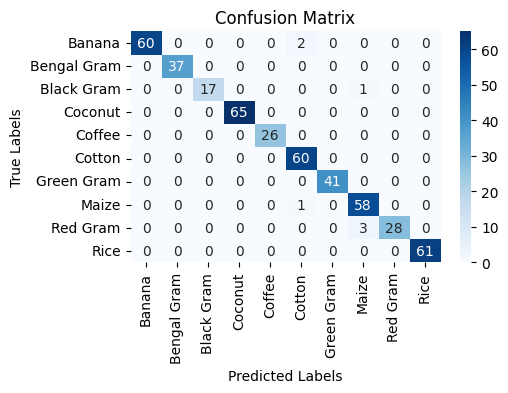


Overall accuracy: 0.9847826086956522
Overall precision: 0.9887864823348694
Overall recall: 0.9798463033837554
Overall F1-score: 0.9838475113226476



In [2]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/drive/MyDrive/CIP/Final Datasets/1Last_Crop_Recommendation_Dataset.csv')

X = df[['Temperature (°C)', 'Humidity (%)', 'Rainfall (mm)', 'N (ratio)', 'P (ratio)', 'K (ratio)']]
y = df['Crop']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

nb_clf = GaussianNB(var_smoothing=0.0004)
svm_clf = SVC(C=0.05, kernel='linear', random_state=5)
knn_clf = KNeighborsClassifier(n_neighbors=25, p=5)
dt_clf = DecisionTreeClassifier(max_depth=6, min_samples_split=20, max_features=2, random_state=42)

voting_clf = VotingClassifier(
    estimators=[('nb', nb_clf), ('svm', svm_clf), ('knn', knn_clf), ('dt', dt_clf)],
    voting='hard')

voting_clf.fit(X_train, y_train)

input_sample = [[29, 86, 53, 0.38, 0.39, 0.23]] # example input sample
predicted_crop = voting_clf.predict(input_sample)
print(f"\nPredicted crop for input sample : {predicted_crop[0]}")

y_pred = voting_clf.predict(X_test)

report = classification_report(y_test, y_pred, output_dict=True)
print("\nClassification Report :\n\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix :\n")

conf_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred), columns=voting_clf.classes_, index=voting_clf.classes_)

plt.figure(figsize=(5,3))
sns.heatmap(conf_matrix, annot=True, cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

accuracy = report['accuracy']
precision = report['macro avg']['precision']
recall = report['macro avg']['recall']
f1_score = report['macro avg']['f1-score']
print(f"\nOverall accuracy: {accuracy}")
print(f"Overall precision: {precision}")
print(f"Overall recall: {recall}")
print(f"Overall F1-score: {f1_score}\n")

Saving Trained Model

In [ ]:
! pip install joblib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import joblib

# Save the trained model as a binary file
joblib.dump(voting_clf, 'Crop_PREDICT_Final.joblib')

from google.colab import files

# Downloads the my_model.json file to your local machine
files.download('Crop_PREDICT_Final.joblib')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [3]:
import pickle

# Save the model as a pickle file
with open('trained_PREDICT_model.pkl', 'wb') as f:
    pickle.dump(voting_clf, f)

# Download the pickle file
from google.colab import files
files.download('trained_PREDICT_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>